# Model Server Demo

This notebook demonstrates how to receive simulations from the server.

In [1]:
import requests
import json
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

## Server Configuration

In [36]:
# Server configuration
SERVER_URL = "http://51.15.197.220:8083" # "http://localhost:8000"
SAMPLE_IMAGE_PATH = "../assets/sample1.png"

## Check Server Status

In [37]:
# Check if server is running
try:
    response = requests.get(f"{SERVER_URL}/")
    if response.status_code == 200:
        status = response.json()
        print("Server Status:")
        print(json.dumps(status, indent=2))
    else:
        print(f"Server returned status code: {response.status_code}")
except requests.exceptions.ConnectionError:
    print("❌ Server is not running. Please start the server first with: python main.py")
except Exception as e:
    print(f"❌ Error connecting to server: {e}")

Server Status:
{
  "name": "Upskiller Model Server",
  "status": "running",
  "version": "2.0.0"
}


## Load and Display Sample Image

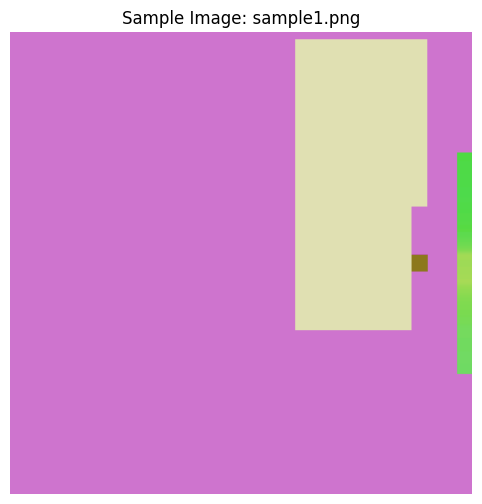

Image size: 4194304


In [41]:
# Load and display the sample image
image_path = Path(SAMPLE_IMAGE_PATH)

if image_path.exists():
    # Load image
    image = cv2.imread(str(image_path), cv2.IMREAD_UNCHANGED)
    
    # Display image
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.title(f"Sample Image: {image_path.name}")
    plt.axis('off')
    plt.show()
    
    print(f"Image size: {image.size}")
    # print(f"Image mode: {image.mode}")
else:
    print(f"❌ Sample image not found at: {image_path}")

## Make Prediction Request

In [ ]:
# Make simulation request
if image_path.exists():
    try:
        # Prepare the file for upload
        with open(image_path, 'rb') as f:
            files = {
                'file': (image_path.name, f, 'image/png')
            }
            
            # Make simulation request
            print("🔄 Making simulation request...")
            response = requests.post(f"{SERVER_URL}/run", files=files)
            
            if response.status_code == 200:
                result = response.json()
                print("✅ Simulation successful!")
            else:
                print(f"❌ Simulation failed with status code: {response.status_code}")
                print(f"Error: {response.text}")
                
    except requests.exceptions.ConnectionError:
        print("❌ Could not connect to server. Make sure the server is running.")
    except Exception as e:
        print(f"❌ Error during simulation: {e}")
else:
    print("❌ Cannot make simulation - sample image not found")

🔄 Making prediction request...
✅ Prediction successful!


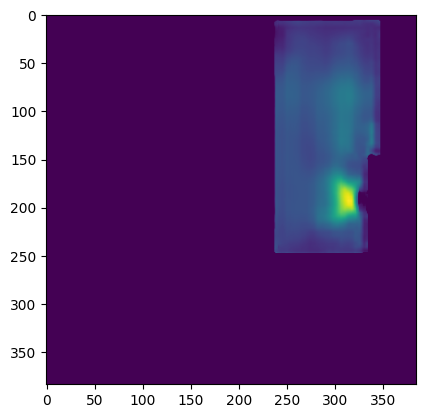

In [ ]:
res = np.array(result["simulation"])
plt.imshow(res)